### <군집(Clustering) 분석>

- 비지도 학습 방법

- 독립 변수만 존재하고, 종속 변수는 존재하지 않는 경우를 -> 비지도 학습이라고 한다.

- 스터디를 위해 제공되는 데이터 경우에는 종속 변수를 제공해서 예측 결과(군집결과)를 확인 시켜주는 경우도 있다.

- 일반적으로는 데이터 수집 시 정제되지 않은 뉴스 데이터, 이미지 데이터 등과 같은 형태의 데이터를 군집 분류하게 되기 떄문에, 정답은 없다고 생각하면 된다.

- 군집 분석은 패턴이 유사한 데이터들간에 묶는 작업을 수행한다.

- 묶음 단위를 군집(Cluster)라고 칭한다.

- 대표 모델 : KMeans(K평균) 모델

### <KMeans(K평균) 모델>

- 모델 스스로 패턴이 유사한 특성들을 묶으면서 중심 평균을 구하는 방식

- 점진적으로 패턴이 유사한 특성들끼리 묶어나가는 방식으로 특성들이 묶이면서 중심에 대한 평균이 이동된다.

- 가장 대표적인 군집 모델이다.

- 특징

    - 군집할 개수(k 변수라고 한다)를 미리 정의해야 한다.
 
    - 군집할 개수는 지도학습에서의 종속 변수의 범주의 개수라고 생각하면 된다.
 
    - 군집의 개수를 이미 알고 있는 경우도 있으며, 아닌 경우도 있다.
 
    - 군집의 개수를 이미 알고 있는 경우에는 직접 개수를 정의하면 된다.
 
    - 모르는 경우에는 하이퍼 파라미터 튜닝을 통해 적절한 갯수를 선정하면 된다.
 
    - 단, 모델 생성 시에 최초에 군집의 개수는 정의해야 하기 때문에 임의 개수를 정해서 넣어주어야 한다.
 
- 작동 방식

    - 군집의 개수 정하기 : 군집의 개수를 K 라고 칭한다.
 
    - 데이터들을 이용해서 무작위로 K 개의 클러스터 중심을 정한다(최초 중심점은 무작위로 모델이 스스로 정한다).
 
    - 각 데이터들이 가장 가까운 클러스터 중심을 찾아서 배치된다.
 
    - 중심점에 모이는 데이터들의 평균값을 지속적으로 계산하여 최적의 중심점을 찾아 이동한다.
 
    - 클러스터의 중심점에 변화가 없을 때까지 스스로 반복 훈련이 진행된다.

In [1]:
### 사용할 라이브러리 import
# - 데이터 처리를 위해 형식적으로 넣어 준다.
import pandas as pd
import numpy as np

# - 정규화
from sklearn.preprocessing import StandardScaler

# - 데이터 분류, 하이퍼 파라미터 튜닝
from sklearn.model_selection import train_test_split, GridSearchCV

# - 오차 행렬도
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 군집 모델
from sklearn.cluster import KMeans

In [2]:
### 와인 데이터 불러오기
# - 데이터프레임 변수명 : data

file_path = './data/08_wine.csv'
data = pd.read_csv(file_path)
data

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [3]:
### 데이터 결측, 이상, 중복 확인
# - 이미 사용한 데이터로 확인됨

In [4]:
### 독립 변수와 종속 변수 분리
# - 수집된 데이터 내에 독립 변수와 종속 변수가 함께 존재하기 때문에, 분리를 한다.
# - 독립 변수명 : X(iloc 사용), 종속 변수명 : y

# 독립 변수
X = data.iloc[:,:-1]
# 종속 변수
y = data['class']

print(len(X),len(y))
X

6497 6497


,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51
...,...,...,...
6492,11.2,1.6,3.27
6493,9.6,8.0,3.15
6494,9.4,1.2,2.99
6495,12.8,1.1,3.34


In [5]:
### 데이터 스케일링
# - 클래스 변수 : scaler
# - 독립 변수명 : X_scaled

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled.shape)
X_scaled

(6497, 3)


array([[-0.91546416, -0.7447781 ,  1.81308951],
       [-0.58006813, -0.59764007, -0.11507303],
       [-0.58006813, -0.66069923,  0.25811972],
       ...,
       [-0.91546416, -0.89191614, -1.42124765],
       [ 1.9354021 , -0.91293585,  0.75571005],
       [ 1.09691202, -0.97599501,  0.25811972]])

In [6]:
### 훈련 : 테스트 = 8 : 2로 분류
# - 변수명 : X_train, X_test, y_train, y_test 사용

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=42, test_size=0.2)
f'X_train = {X_train.shape}, y_train = {y_train.shape}, X_test = {X_test.shape}, y_test = {y_test.shape}'

'X_train = (5197, 3), y_train = (5197,), X_test = (1300, 3), y_test = (1300,)'

In [7]:
### 하이퍼 파라미터 튜닝하기
# - 종속 변수를 알고있다라는 가정 하에 진행 / 모르면 진행 못 함

### 튜닝을 위해 하이퍼 파라미터 속성 및 값의 범위 정의하기
# - 하이퍼 파라미터 변수들 정의

param_grid = {
    # - 초기 중심점 설정 횟수
    'n_init' : [10, 30, 50],

    # - 최대 반복 횟수
    'max_iter' : [10, 30, 50],

    # - 중심점의 이동이 설정 값보다 작으면, 종료 (설정값 지정, 학습 정확도라고 생각하면 된다).
    'tol' : [0.0001, 0.001, 0.01, 1]

}

### 튜닝 클래스에 정의할 속성 정의
# - 데이터 분할 개수
cv = 5

# - 클러스터 개수(군집할 개수)
n_cluster = 2

# - 평가 기준
scoring = 'accuracy'

In [8]:
### 튜닝 클래스에 넣어 줄 모델 생성
# - 모델 생성 시에 클러스터의 개수를 지정해 주어야 한다.

kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans

KMeans(n_clusters=2, random_state=42)

In [9]:
## 튜닝 클래스에 생성한 모델 넣어서 최적의 모델 추출하기

### 튜닝 클래스 생성하기
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=cv, scoring=scoring)
grid_search

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [10]:
### 훈련시키기 (튜닝 진행)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [11]:
### 최적의 하이퍼 파라미터가 적용된 모델 추출

best_model = grid_search.best_estimator_
best_model

KMeans(max_iter=10, n_clusters=2, n_init=30, random_state=42, tol=0.01)

In [12]:
### 훈련 및 테스트 데이터로 예측하기
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

### 훈련 및 테스트 정확도 확인하기
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

train_acc, test_acc, train_acc - test_acc

(0.4558399076390225, 0.46307692307692305, -0.0072370154379005625)

In [13]:
### 오차행렬도 계산하기
conf_matrix = confusion_matrix(y_test, test_pred)
conf_matrix

array([[ 12, 329],
       [369, 590]], dtype=int64)

In [14]:
### 원본 데이터와 클러스터 결과를 이용하여 산점도 시각화
# - library import
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
### 시각화에 사용할 데이터 생성하기
data = {
    'alcohol' : X_train[:,0],
    'sugar' : X_train[:,1],
    'pH' : X_train[:,2],
    'class' : y_train,
    'cluster' : train_pred
}

# - 데이터 프레임 생성하기
train_data = pd.DataFrame(data=data)
train_data

,alcohol,sugar,pH,class,cluster
1916,0.006875,0.474366,-0.177272,1.0,0
947,1.600006,-0.702739,0.258120,0.0,1
877,1.096912,-0.702739,1.191102,0.0,1
2927,1.013063,-0.891916,0.942306,1.0,1
6063,-0.999313,2.092884,-0.674862,1.0,0
...,...,...,...,...,...
3772,-1.083162,2.376650,-0.426067,1.0,0
5191,0.174573,-0.324384,0.817909,1.0,1
5226,-0.831615,0.032951,0.133722,1.0,1
5390,-0.831615,0.537425,-0.239471,1.0,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

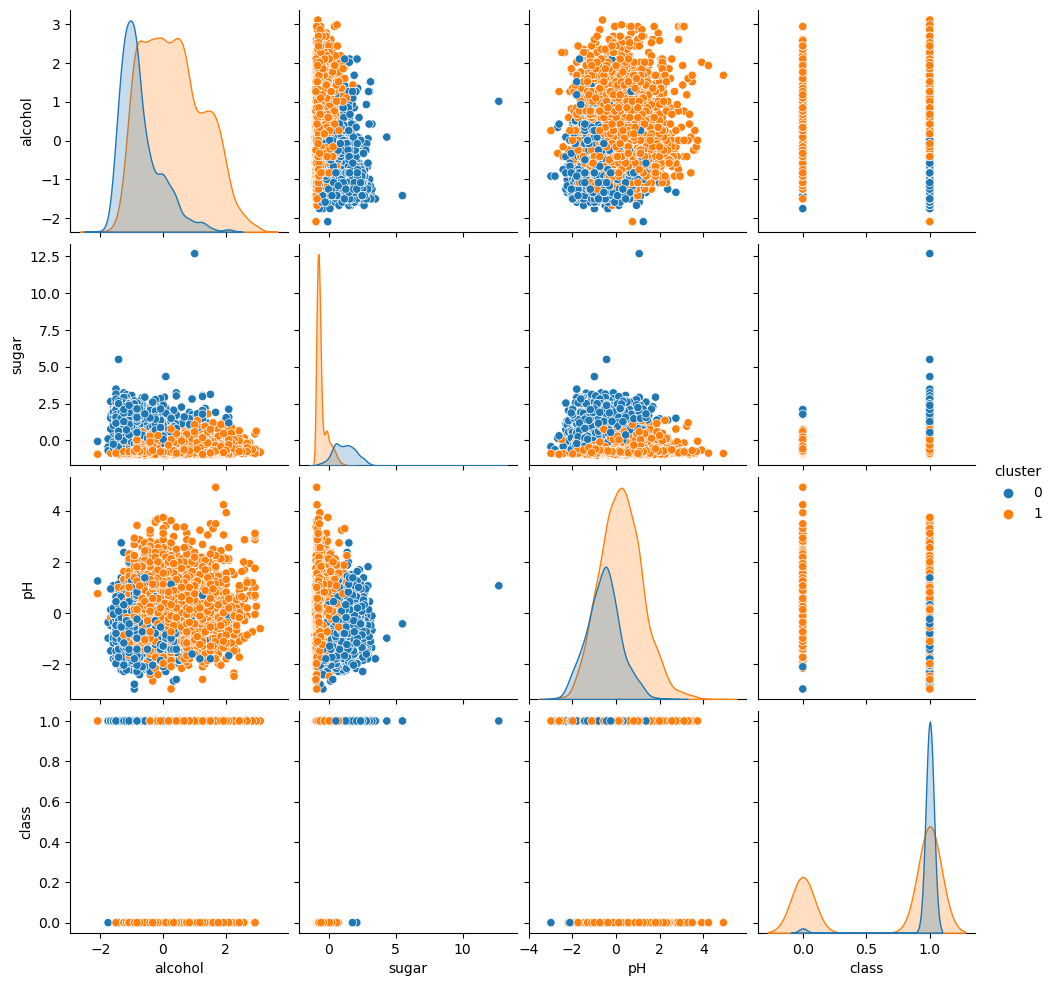

In [16]:
### 산점행렬도 시각화
# - hue : 시각화시 비교할 범주 특성 지정
sns.pairplot(train_data, hue='cluster')
plt.show();

In [17]:
######### [iris(붓꽃)] 데이터셋 ###############

In [18]:
### iris(붓꽃) 데이터셋 라이브러리
from sklearn.datasets import load_iris

### 군집 분석 평가 함수
# - 실루엣 정확도 : 군집 분석 평가 함수
# - 값의 범위 : -1 ~ 1 사이의 값 사용
# - -1에 가까울수록 : 군집 분류가 잘 안 된 경우
# - 0에 가까울수록 : 이도 저도 아닌 상태
# - 1에 가까울수록 : 군집이 잘 된 경우

from sklearn.metrics import silhouette_score

In [19]:
### iris 데이터 읽어들이기
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### <독립 변수 특성>

- sepal length : 꽃받침 길이

- sepal width : 꽃받침 너비

- petal length : 꽃잎 길이

- petal width : 꽃잎 너비

- 단위는 cm

### <종속 변수 특성>

- 종속 변수 범주 : 0, 1, 2 로 구성되어 있음(붓꽃의 품종을 의미)

- 0 : 세토사(setosa)

- 1 : 버시컬러(versicolor)

- 2 : 버지니카(virginica)

### <분석 주제>

- 4가지 독립 변수 특성을 이용하여 -> 붓꽃의 품종을 군집 분류하기

#### 머신러닝에서 사용하는 변수명들(규칙은 없다. 주로 사용되는 이름들)

- 원본 데이터 : 데이터프레임 또는 넘파이 배열 형태

- 독립 변수명 : X, X_data, 또는 데이터 성격에 맞는 이름

- 종속 변수명 : y, y_data, 또는 데이터 성격에 맞는 이름

- 훈련 독립 변수명 : X_train, train_input, train_X

- 훈련 종속 변수명 : y_target, train_target, train_y

- 검증 독립 변수명 : X_val, val_input, val_X

- 검증 종속 변수명 : y_val, val_target, val_y

- 테스트 종속 변수명 : X_test, test_X, test_input

- 테스트 종속 변수명 : y_test, test+_y, test_target

#### 데이터 작성 문법(규칙)

- 함수 작성 규칙 : train_test_split(독립변수, 종속변수, 검증(테스트)기준 분류비율(test_size), 랜덤규칙(random_state))

- 함수가 반환한 값의 순서 : 훈련 독립 변수, 검증(테스트) 독립 변수, 훈련 종속 변수, 검증(테스트) 종속 변수
'''

In [20]:
### load한 데이터 결과는 딕셔너리 타입으로 독립 변수와 종속 변수 데이터 추출하기
# - 독립 변수명 : X, 종속 변수명 :y

X = iris['data']
y = iris['target']
X.shape, y.shape

((150, 4), (150,))

In [21]:
### 훈련 및 테스트(검증) 데이터로 분류하지 않고, 전체 데이터 모두 사용하여 군집하기

### 군집 모델 생성하기
# - 군집 개수 : 3개
# - 초기 중심점 설정 횟수 : 10
# - 랜덤 규칙 번호 :42
# - 군집 모델 변수명 : kmeans_model

kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_model

KMeans(n_clusters=3, n_init=10, random_state=42)

In [23]:
### 훈련하기
# - 군집 모델에서는 훈련과 예측이 동시에 진행된다.
# - 훈련 및 예측 함수 :fit_predict()
kmeans_labels = kmeans_model.fit_predict(X)

print(kmeans_labels)
print(y)

### 원본의 0 값은 -> 1번 군집으로 분류된 것으로 보임
### 원본의 1 값은 -> 0번 군집으로 분류된 것으로 보임
### 원본의 2 값은 -> 2번 군집으로 분류된 것으로 보임
# - 군집 번호는 모델 스스로가 순서 상관없이 자동 부여 시킴

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
### 군집 결과 시각화하기
# 주성분 분석을 통한 시각화(PCA)

### 주성분 분석(PCA)

- 훈련에 사용된 특성들 중에 특징을 가장 잘 나타낼 수 있는 특성들을 추출하는 방식

- 특징을 잘 나타내는 특성을 추출하여, 특성들을 축소 시키는 방식으로 사용된다.

- 이를 '차원 축소'라고 한다.

- 주요 특징을 가지는 특성들만을 추출하여 사용하는 방식으로, 데이터가 매우 많은 경우에 유리하다

- 빠른 처리가 가능하다

In [25]:
### 주성분 분석(PCA) library import
from sklearn.decomposition import PCA

In [26]:
### 주성분 분석 클래스 생성하기
# - n_components : 주성분을 몇 개로 차원을 축소할지 정의
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [27]:
### 독립 변수에서 주성분 찾기
pca.fit(X)

PCA(n_components=2)

In [30]:
### 찾은 주성분의 차원으로 변환하기
# - 주성분의 차원축소는로 인해 -> 열의 갯수가 줄어든 것을 볼 수 있다(150행 2열로 변환됨)

X_pca = pca.transform(X)
print(X_pca.shape)
X_pca

(150, 2)


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

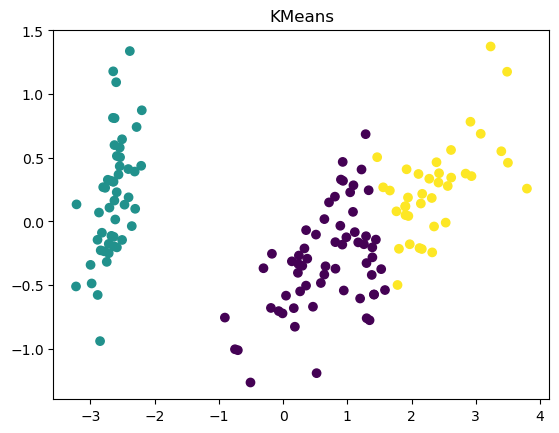

In [35]:
### 군집화 결과 시각화하기
plt.title('KMeans')
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.show();

In [36]:
### 군집 분석 결과 평가하기 : 실루엣 정확도
# -1 : 군집이 잘 안 된 상태
# 0 : 군집의 결과가 이도저도 아닌 상태(겹치는 부분이 있다는 의미)
# 1 : 군집이 잘 된 상태

### (군집에 대한 평가 - PCA하기 전에 평가)독립변수와 군집 데이터를 이용
s_score = silhouette_score(X, kmeans_labels)
s_score

0.5528190123564095

In [40]:
### 주성분 2개에 대한 분산 비율을 통한 품질 성능 확인하기
# - 분산비율의 개수 추출하기
print(pca.explained_variance_ratio_.shape)

# -분산 비율 데이터 추출하기
print(pca.explained_variance_ratio_)

(2,)
[0.92461872 0.05306648]


주성분 2개 중에 첫번쨰 주성분의 데이터(첫번째 열)가 특징을 잘 가지고 있는 데이터임

In [41]:
### 주성분 품질성능 데이터 계산하기
# - 분산비율값을 모두 합산한 결과가 품질 성능을 나타낸다.
# - 값의 범위 : 0~1
# - 1에 가까울수록 품질 성능이 좋다고 판단한다.
# - 독립 변수 전체를 사용하지 않더라도, 주성분 데이터 2개의 특성으로 분류 잘 할 수 있다는 의미

np.sum(pca.explained_variance_ratio_)

0.977685206318795